# SEL0620 - Controle Digital

## Tutorial da Biblioteca de Controle -- Parte 1

Este tutorial mostra alguns exemplos do uso da [biblioteca de controle para Python](https://python-control.readthedocs.io/).

### Preparação do Ambiente Colab

O comando a seguir instala a biblioteca de controle no ambiente do Colab

In [1]:
# !pip install slycot -- quiet  # biblioteca opcional
!pip install control --quiet

     |████████████████████████████████| 339 kB 7.7 MB/s 


Carrega as bibiotecas 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import control as ct
from control.matlab import * #Esta opção permite que se use comandos disponíveis que são equivalentes aos comandos do Matlab

### Função de transferência

Considere uma função de trânsferência de primeira ordem:

$G(s) = K\frac{1}{\tau s + 1}$

onde $\tau$ é a constante de tempo, e $K$ é o ganho do sistema.

A seguinte sequencia de código pode ser usada para representar $G(s)$ utilizando o comando [`tf`](https://python-control.readthedocs.io/en/0.9.0/generated/control.tf.html#control.tf) da biblioteca de controle em Python:

In [14]:
#Variável 's'
s = tf('s')

#Parâmetros do sistema
tau = 0.1
K = 5

#Função de transferência
G1 = K/(tau*s + 1) # utilizando a definição da variável s que foi feita
G2 = tf([K],[tau, 1]) #utilizando um vetor/lista com os coeficientes do polinômio do numerador e do denominador

#Mostra a função de transferência
print('G(s) = ', G1)
print('G(s) = ', G2)


G(s) =  
    5
---------
0.1 s + 1

G(s) =  
    5
---------
0.1 s + 1



### Resposta em Frequencia

O comando [`bode`](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.bode.html) pode ser usado para plotar a resposta em frequencia do sistema.

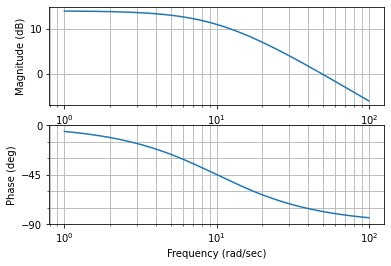

In [25]:
bode(G1)
plt.show(block=False)


Exemplo de algumas opções de parâmetros do comando bode.

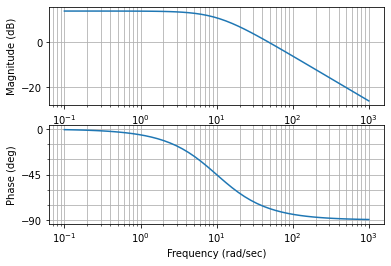

Alguns valores da resposta em frequencia:
Para frequencia 0.1 rad/s, o ganho do sistema é 13.97896581395175 dB, e a fase é -0.5729386976834862 graus
Para frequencia 1000.0 rad/s, o ganho do sistema é -26.02103418604825 dB, e a fase é -89.42706130231642 graus


In [47]:
ganho, fase, w = bode(G1, logspace(-1, 3)) # Define o intervalo de frequencia utilizado entre 10^(-1) e 10^3.
plt.show(block=False)

# Os primeiros e últimos valores retornados no vetor ganho, fase, w
print('Alguns valores da resposta em frequencia:')
print('Para frequencia', w[0],'rad/s, o ganho do sistema é', 20*np.log10(ganho[0]), 'dB, e a fase é', 180*fase[0]/pi , 'graus')
print('Para frequencia', w[-1],'rad/s, o ganho do sistema é', 20*np.log10(ganho[-1]), 'dB, e a fase é', 180*fase[-1]/pi , 'graus')


O comando `bode` pode ser usado para calcular a resposta em frequência do sistema para uma frequencia específica.

In [48]:
w = [1/tau] #vetor w contendo as frequencia para as quais se quer obter a resposta em frequencia do sistema
ganho, fase, w = bode(G1, w, plot=False)
print('Para frequencia', w[0],'rad/s, o ganho do sistema é', 20*np.log10(ganho[0]),'dB, e a fase é', 180*fase[0]/pi ,'graus')


Para frequencia 10.0 rad/s, o ganho do sistema é 10.969100130080564 dB, e a fase é -45.0 graus


### Resposta transitória 

O comando [`step`](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.step.html) é utilizado para obter a resposta do sistema para uma entrada degrau.

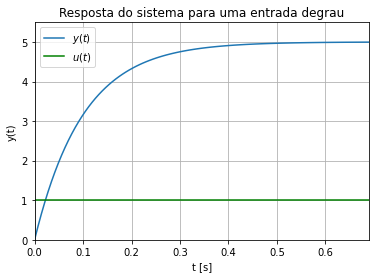

In [72]:
# Resposta ao degrau unitário:
y, t = step(G1)
plt.plot(t, y)

# Para mostrar a entraga degrau no gráfico:
A=1 # Amplitude do degrau
u = A*np.ones(np.shape(y))
plt.plot(t, u,'g')

plt.ylabel('y(t)')
plt.xlabel('t [s]')
plt.title("Resposta do sistema para uma entrada degrau")
plt.legend(['$y(t)$','$u(t)$'])
plt.grid(True)
plt.axis([0,t[-1],0,1.1*y[-1]])
plt.show(block=False)

Observe que para o exemplo, o sistema $G(s)$ possui um ganho DC, $K=5$, e por essa razão, a resposta estácionária do sistema é K vezes a amplitude do degrau. Para $u(t) = 1(t)$, $U(s) = 1/s$, e $y_{ss} = \lim_{t\rightarrow \infty} y(t) = \lim_{s\rightarrow 0} sY(s) = K$.

Observe também que para o sistema de primeira ordem, a resposta do sistema para uma entrada degrau unitária é $y(t) = 0.632K$ para $t=\tau$.

In [73]:
y_i, t_i = step(G1,tau)
print('Para t=',t_i[-1],'y/K=',y_i[-1]/K)

Para t= 0.1 y/K= 0.632120558828557


### Discretização da saída da planta com retentor de ordem zero

Considere que o sinal da saída do sistema é amostrado com frequência $w_0$, e o valor permanece constante entre cada período de amostragem $T_0$, ou seja, a saída $y(t)$ é amostrada no instante $t=kT_0$ e permanece constante até que se realize uma nova amostragem no instante de tempo $t=(k+1)T_0$.

Esse tipo de amostragem associada com o bloco retentor de ordem zero (*sample holder*) pode ser simulado, por exemplo, pelo código a seguir que utiliza a função `step` avaliada em um vetor de instantes de tempo igualmente espaçados de $T_0$. 

A função [`pyplot.step`](where='post',) com a opção `where='post'` é utilizada para mostrar a resposta discretizada com o retentor de ordem zero. 

Observação: Não confundir a função `step` da biblioteca de controle com a função `pyplot.step` da biblioteca Matplotlib. O propósito de cada função é completamente diferente.

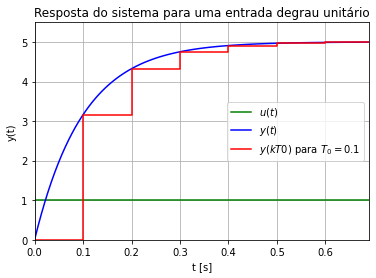

In [88]:
t_ini = 0
t_fim = 1
T0 = 0.1

ta = np.arange(t_ini,t_fim+T0,T0) 
yd, td = step(G1,ta)

plt.plot(t, u,'g')
plt.plot(t, y,'b')
plt.step(td, yd,'r',where='post') # veja a documentação do pyplot.step e exemplos

plt.ylabel('y(t)')
plt.xlabel('t [s]')
plt.title("Resposta do sistema para uma entrada degrau unitário")
plt.legend(['$u(t)$','$y(t)$','$y(kT0)$ para $T_0 = 0.1$'])
plt.grid(True)
plt.axis([0,t[-1],0,1.1*y[-1]])
plt.show(block=False)
